Seaborn 是依托于matplotlib库的衍生库，下面学习其常用用法。

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

## 1、 主题、背景设置——set_style( )、set( )

set_style()是用来设置主题的，Seaborn有五个预设好的主题： darkgrid , whitegrid , dark , white ,和 ticks  默认： darkgrid

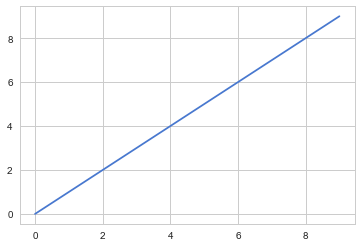

In [52]:
sns.set_style('whitegrid')
plt.plot(np.arange(10))

set( )通过设置参数可以用来自定义背景，调色板等，更加常用。

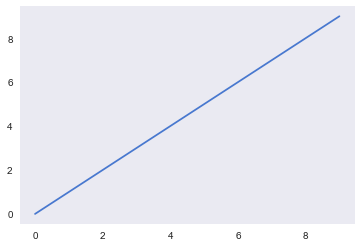

In [65]:
sns.set(style="dark", palette="muted", color_codes=True)     # palette 调色板
plt.plot(np.arange(10))

## 2、柱状图、密度曲线图——distplot( )、kdeplot( )

使用莺尾花iris数据集进行演示

In [58]:
df_iris = pd.read_csv('datasets/iris_data.csv')
df_iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


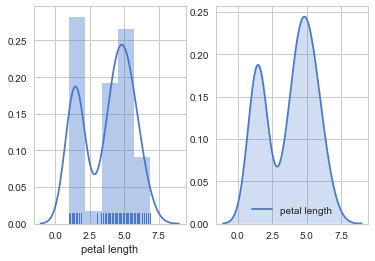

In [54]:
fig,axes = plt.subplots(1,2)
sns.distplot(df_iris['petal length'],ax = axes[0],kde =  True, rug = True )  # kde 密度曲线  rug 边际毛毯 
sns.kdeplot(df_iris['petal length'], ax = axes[1], shade=True)                # shade  阴影 
plt.show()

fig,axes = plt.subplots(1,2)
这种用法，可以一次产生1×2个子窗口，即1行2列。并且numpy数组方式保存在axes中，这样可以通过对axes进行索引访问每个子窗口。

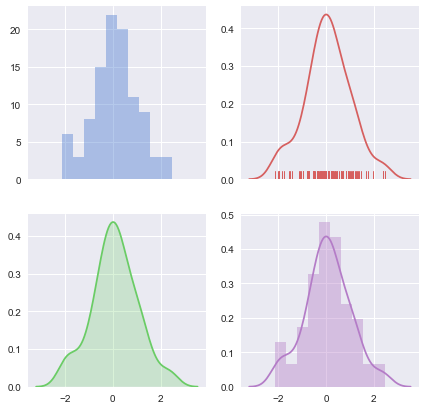

In [55]:
sns.set( palette="muted", color_codes=True)  
rs = np.random.RandomState(10) #设置随机种子
d = rs.normal(size=100)  #生成一个正态分布数组，总长100
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)  
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])  
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])  
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])  
sns.distplot(d, color="m", ax=axes[1, 1])  #以上四句在四个figure中绘图
plt.show() 

In [56]:
rs = np.random.RandomState(10) #numpy数组随机数生成
d = rs.normal(size=100)
d

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155, -0.35087189, -0.93943336, -0.48933722, -0.80459114,
       -0.21269764, -0.33914025,  0.31216994,  0.56515267, -0.14742026,
       -0.02590534,  0.2890942 , -0.53987907,  0.70816002,  0.84222474,
        0.2035808 ,  2.39470366,  0.91745894, -0.11227247, -0.36218045,
       -0.23218226, -0.5017289 ,  1.12878515, -0.69781003, -0.08112218,
       -0.52929608,  1.04618286, -1.41855603, -0.36249918, -0.12

## 3、箱型图——boxplot( )

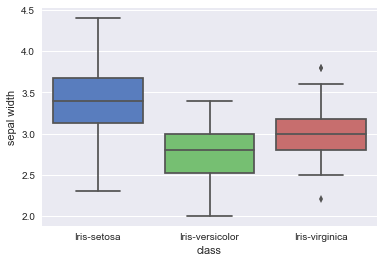

In [59]:
sns.boxplot(x = df_iris['class'],y = df_iris['sepal width'])

## 4、热力图——heatmap( )

## 5、散点图scatter( )

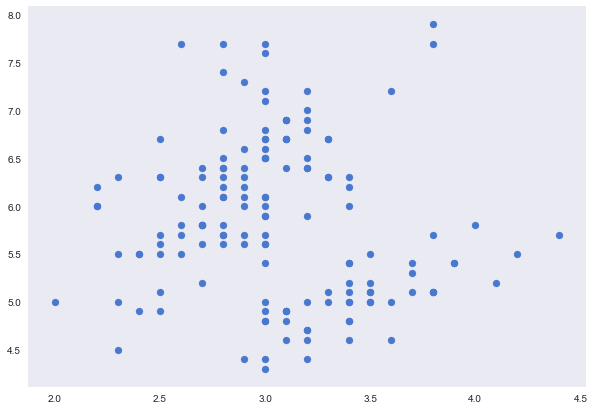

In [78]:
f, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x = df_iris['sepal width'],y = df_iris['sepal length'], color='b')

## 6、pointplot画出变量间的关系

In [83]:
data = pd.DataFrame({'area':[50,55,60,65,70,75,80,85,90],'price':[1000,1030,1400,1800,2400,3000,4000,5000,7000]})
data

,area,price
0,50,1000
1,55,1030
2,60,1400
3,65,1800
4,70,2400
5,75,3000
6,80,4000
7,85,5000
8,90,7000


Text(0,0.5,'Price')

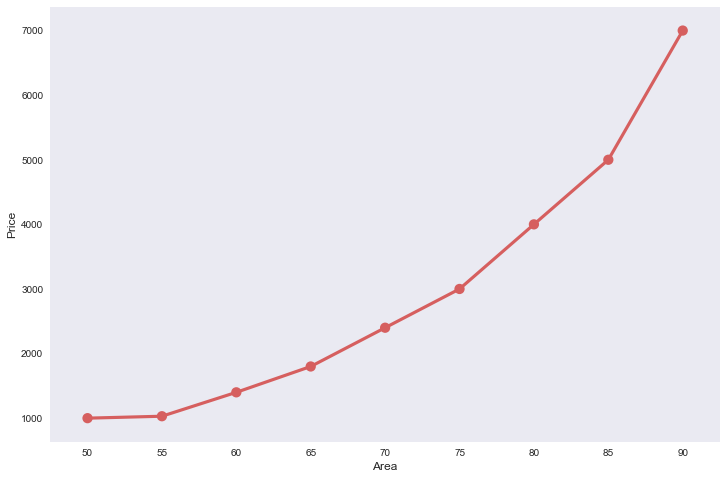

In [90]:
plt.figure(figsize=(12,8))
sns.pointplot(data.area.values,data.price.values,alpha=0.8, color='r') #回头学习参数
plt.xlabel('Area', fontsize=12)
plt.ylabel('Price', fontsize=12)
#plt.xticks(rotation='vertical')

Text(0,0.5,'Price')

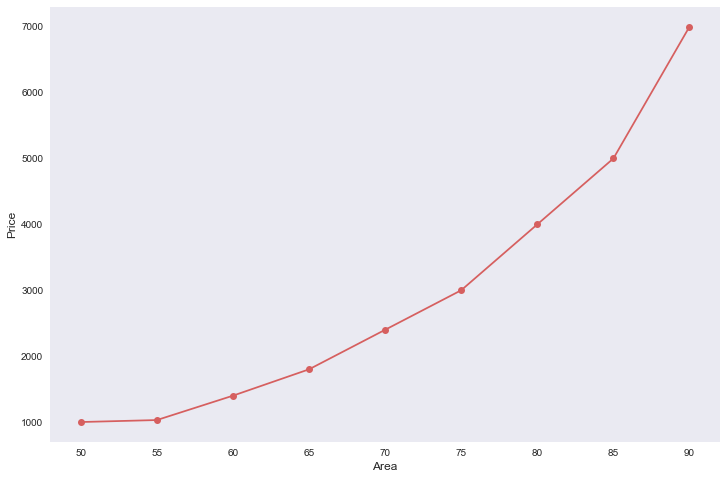

In [94]:
plt.figure(figsize=(12,8))
plt.plot(data.area.values,data.price.values,'r-o')
plt.xlabel('Area', fontsize=12)
plt.ylabel('Price', fontsize=12)

以上对比了seaborn的pointplot点线图，与matplotlib里的plot函数，在plot的参数里设置图标为o即可变为一样的图形。
可以看出两者绘图内容的差异。

## 7、pairplot( )

这个绘图函数一般用于分类问题，特别是多分类。各个特征之间互相绘图，图中可明显将要进行分类的种类分开，同时可以验证特征之间的关联性。若关联性较强，这两个特征绘出的分类图可能无法分出类别，特征关联性弱的话，或可完美分开labels。
以上为自己分析的结果，后续查资料继续深入学习。

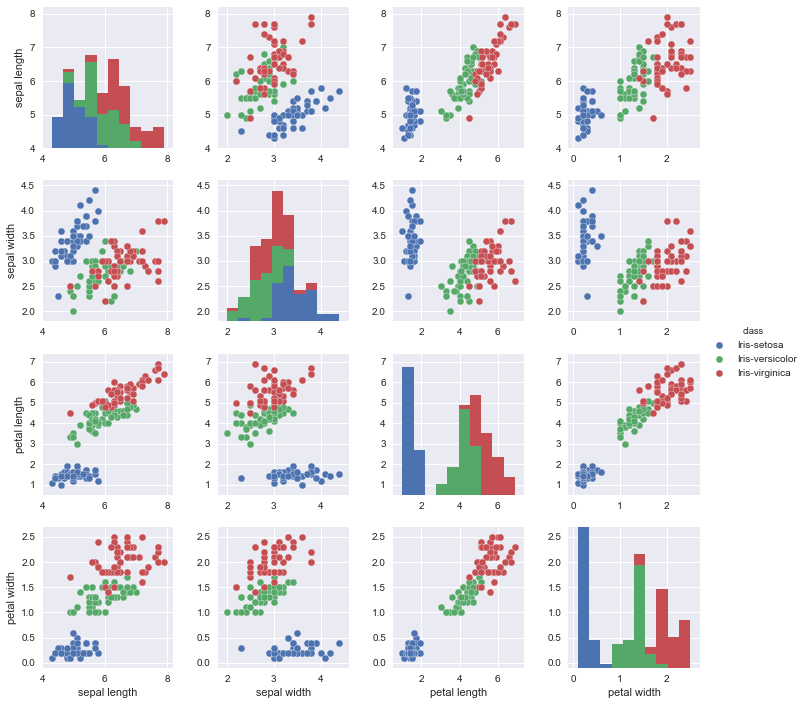

In [98]:
#sns.set() #使用默认配色  
sns.pairplot(df_iris,hue="class") #hue 选择分类列  

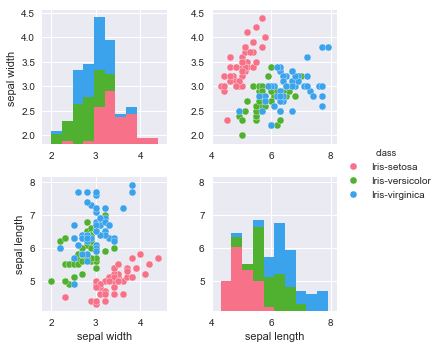

In [100]:
sns.pairplot(df_iris, vars=["sepal width", "sepal length"],hue='class',palette="husl")

## 8、水平柱状图——barplot( )

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text yticklabel objects>)

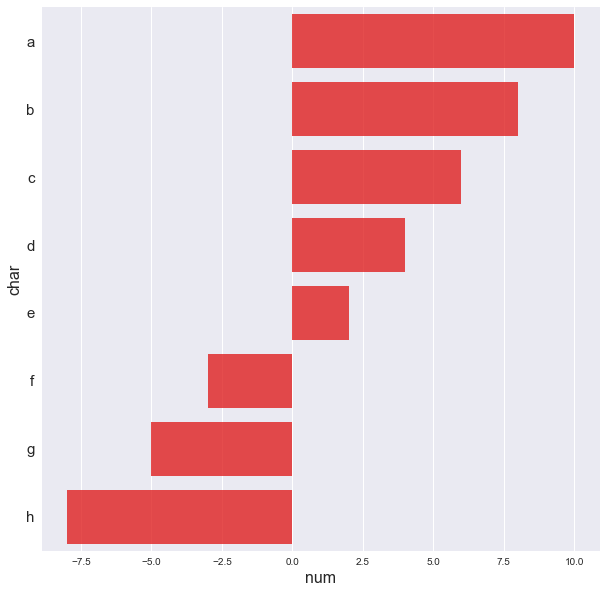

In [115]:
f, ax=plt.subplots(figsize=(10,10))
aa = pd.Series([10,8,6,4,2,-3,-5,-8],index = ['a','b','c','d','e','f','g','h'])
#sns.barplot(x=[1,2,3,4,5,6,7], y=['a','b','c','d','e','f','g'],orient='h', alpha=0.8, color='red')

#orient='h'表示是水平展示的，alpha表示颜色的深浅程度
sns.barplot(x=aa.values,y=aa.index,orient='h',alpha=0.8, color='red')
#设置y轴、X轴的坐标名字与字体大小
plt.ylabel('char', fontsize=16)
plt.xlabel('num', fontsize=16)
#设置X轴的各列下标字体是水平的
plt.xticks(rotation='horizontal')
#设置Y轴下标的字体大小
plt.yticks(fontsize=15)

In [118]:
aa = pd.Series([10,8,6,4,2,-3,-5,-8],index = ['a','b','c','d','e','f','g','h'])
print(aa.values,aa.index)

[10  8  6  4  2 -3 -5 -8] Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='object')


## 9、柱状图就是matplotlib柱状图

注意学习其参数：plt.bar(index,values,width,color,label)

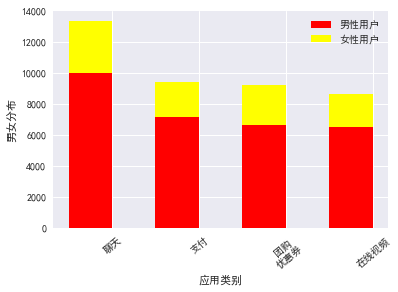

In [134]:
num = np.array([13325, 9403, 9227, 8651])
ratio = np.array([0.75, 0.76, 0.72, 0.75])
men = num * ratio
women = num * (1-ratio)
x = ['聊天','支付','团购\n优惠券','在线视频']
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, men, width, color='red', label='男性用户')
plt.bar(idx, women, width, bottom=men, color='yellow', label='女性用户')  
#这一块可是设置bottom,top，如果是水平放置的，可以设置right或者left。
plt.xlabel('应用类别')
plt.ylabel('男女分布')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend()

<Container object of 6 artists>

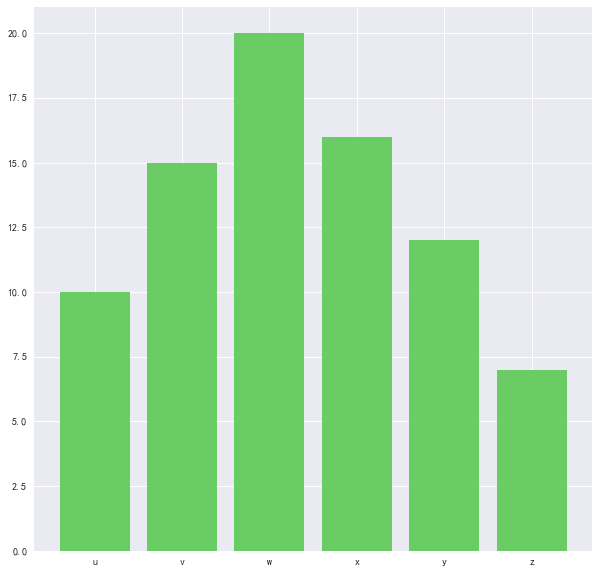

In [133]:
plt.figure(figsize=(10,10))
plt.bar(['u','v','w','x','y','z'],[10,15,20,16,12,7],width=0.8,color='g')